# Python Bindings Playground

## Set Up the Environment

In [1]:
import sys
import subprocess
from pathlib import Path

assert sys.prefix != sys.base_prefix, "You need to install Jupyter inside a virtual environment and run the notebook from there"

In [2]:
!maturin develop

🔗 Found pyo3 bindings with abi3 support for Python ≥ 3.6
🐍 Not using a specific python interpreter (With abi3, an interpreter is only required on windows)
    Finished dev [unoptimized + debuginfo] target(s) in 0.05s


In [3]:
!pip install --quiet scipy matplotlib

You should consider upgrading via the '/home/michael/Documents/hotg-ai/rune/python/env/bin/python -m pip install --upgrade pip' command.


In [4]:
status = subprocess.run(["git", "rev-parse", "--show-toplevel"], stdout=subprocess.PIPE, check=True)

RUNE_PROJECT_ROOT = Path(status.stdout.decode("utf-8").strip())
EXAMPLE_DIR = RUNE_PROJECT_ROOT / "examples"

## Fast Fourier Transform

In [7]:
import rune_py
from rune_py import Fft, NoiseFiltering
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import math

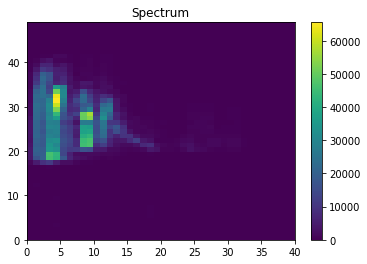

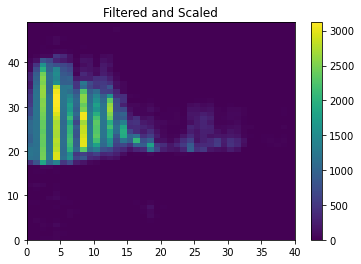

In [10]:
#no = EXAMPLE_DIR / "microspeech" / "data" / "no_b66f4f93_nohash_8.wav"
no = Path("/home/michael/Downloads/18f8afd5_nohash_4(2).wav")
samplerate, data = wavfile.read(no)

fft = Fft()
noise_filtering = NoiseFiltering()

fft.sample_rate = samplerate
noise_filtering.smoothing_bits = 10
noise_filtering.even_smoothing = 0.025
noise_filtering.odd_smoothing = 0.06
noise_filtering.min_signal_remaining = 0.05
noise_filtering.strength = 0.95
noise_filtering.offset = 80.0
noise_filtering.gain_bits = 21

spectrum = fft(data)

fig, axis = plt.subplots() 
heatmap = axis.pcolor(spectrum.reshape(49, 40))
plt.colorbar(heatmap)
axis.set_title("Spectrum")
plt.show()

filtered = noise_filtering(spectrum)

fig, axis = plt.subplots() 
heatmap = axis.pcolor(filtered.reshape(49, 40))
axis.set_title("Filtered and Scaled")
plt.colorbar(heatmap)
plt.show()

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, FloatLogSlider

In [ ]:
def render(smoothing_bits, even_smoothing, odd_smoothing):
    fft = Fft()

    fft.sample_rate = samplerate
    fft.smoothing_bits = smoothing_bits
    fft.even_smoothing = even_smoothing
    fft.odd_smoothing = odd_smoothing
    fft.min_signal_remaining = 0.05
    fft.strength = 0.95
    fft.offset = 80.0
    fft.gain_bits = 21

    spectrum = fft(data).reshape(49, 40)

    plt.imshow(spectrum)
    plt.show()
    
interact(
    render, 
    smoothing_bits=IntSlider(min=0, max=16, value=10),
    even_smoothing=FloatLogSlider(min=-2, max=2, value=0),
    odd_smoothing=FloatLogSlider(min=-2, max=2, value=0),
);

In [ ]:
!maturin develop

import rune_py

for key in dir(rune_py):
    print(key, getattr(rune_py, key))